## Image classification with OpenCV
**OpenCV-Python** is a library of Python bindings designed to solve computer vision problems. In this project, OpenCV is used for image classification.  

### Objective: In this project, I have built a image classsifier to itentify the image of female tennis player.

**Steps:**
   1. Get Data: We need data to train our model. 
   2. Prepare Data: Clean, normalize, and get data in a form that we can feed into our model
   3. Train Model: Trained data using Support Vector Classification(SVC), Logistic Regression, and Random Forest Classification
   4. Evaluate model performance
   5. Parameter tuning

### Imported necessary libraries

In [349]:
import cv2 # importing openCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil  #This module contains functions for operating on files
import pywt 
%matplotlib inline

### Loaded and displayed  image with OpenCV

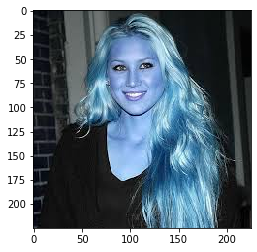

In [350]:
image=cv2.imread("test_image.jpg") #Loaded image 
plt.imshow(image)

###   Loaded harcascade xml files for face and eye detection

In [351]:
#loaded face detected harcascade classifier.
face_cascade = cv2.CascadeClassifier('C:/Users/moush/Desktop/data_science_projects/haarcascade_frontalface_default.xml') 


In [352]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #changed the image color to gray
gray_img.shape

(225, 225)

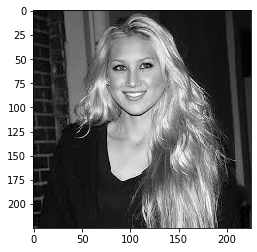

In [353]:
plt.imshow(gray_img, cmap='gray') # gray version of original image

### Face detection

In [354]:
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces

array([[67, 31, 76, 76]], dtype=int32)

In [355]:
(x,y,w,h) = faces[0]
x,y,w,h

(67, 31, 76, 76)

-1

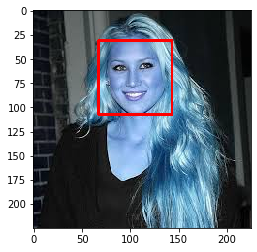

In [356]:
# cv2.rectangle() method is used to draw a rectangle on any image.
face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2) #(255, 0, 0) for red color of rectangle.
plt.imshow(face_img)
cv2.waitKey(0)


In [357]:
#loaded eye detected harcascade classifier.
eye_cascade = cv2.CascadeClassifier('C:/Users/moush/Desktop/data_science_projects/haarcascade_eye.xml')

### Face and eye detection

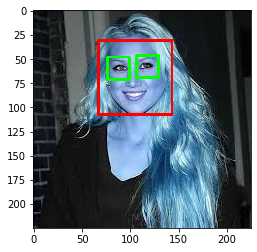

In [358]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

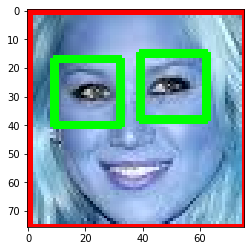

In [359]:

plt.imshow(roi_color, cmap='gray')

In [360]:
# This function will detect and return cropped image with atleast 2 eyes. If eyes are not visible clearly function will return none.
def get_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2: 
            return roi_color

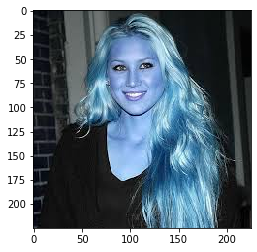

In [361]:
original_image = cv2.imread('test_image.jpg')
plt.imshow(original_image)

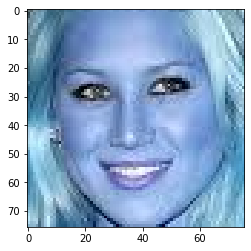

In [362]:
cropped_image = get_image("test_image.jpg")
plt.imshow(cropped_image)

In [363]:
imagepath = "./Dataset/"
cropped_imagepath = "./Dataset/cropped/"

In [364]:
import os
image_dirs = []
for entry in os.scandir(imagepath):
    if entry.is_dir():
        image_dirs.append(entry.path)

In [365]:
import shutil #This module contains functions for operating on files
if os.path.exists(cropped_imagepath):
     shutil.rmtree(cropped_imagepath)
os.mkdir(cropped_imagepath)

#### Saving cropped image
 Saving the cropped images of the female tennis player into the folder called 'cropped'. In this folder only  images with 2 eyes are saved. 

In [366]:
cropped_image_dirs = []
image_filenames_dict = {}

for img_dir in image_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    #print("hi")
    image_filenames_dict[celebrity_name] = []
    #print("hi")
    for entry in os.scandir(img_dir):
        roi_color = get_image(entry.path)
        #print("hi")
        if roi_color is not None:
            cropped_folder = cropped_imagepath + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            image_filenames_dict[celebrity_name].append(cropped_file_path)
            #print("hi")
            count += 1
           

Generating cropped images in folder:  ./Dataset/cropped/Maria Sharapova
Generating cropped images in folder:  ./Dataset/cropped/Serena Williams
Generating cropped images in folder:  ./Dataset/cropped/wAnna_Kournikova


#### Making a dictionary  of the player name

In [367]:
class_dict = {}
count = 0
for celebrity_name in image_filenames_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Maria Sharapova': 0, 'Serena Williams': 1, 'wAnna_Kournikova': 2}

### wavelet transformation
PyWavelets is a free Open Source wavelet transform software for Python programming language. In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc


In [368]:
#The 'haar' wavelet is discontinuous, and resembles a step function. It represents the same wavelet as Daubechies db1
# "level" indicates how many levels of decomposition to draw

def w2d(img, mode='haar', level=1):
    imArray = img #Datatype conversions
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY ) #convert to grayscale
    imArray =  np.float32(imArray)    #convert to float 
    imArray /= 255;
    
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [369]:
X, y = [], []
for celebrity_name, training_files in image_filenames_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5) # 5 levels of decomposition to draw
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [370]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(95, 4096)

### Model training

In [371]:
from sklearn import svm
from sklearn.svm import SVC # Support Vector Classification
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [372]:
#A Pipeline chains multiple Transformers and Estimators together to specify an machine learning workflow. 

from sklearn.pipeline import Pipeline


In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #split into test and train dataset

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) # C is Regularization parameter

pipe.fit(X_train, y_train) # fitting the train dataset 
pipe.score(X_test, y_test)

0.8333333333333334

In [374]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.57      1.00      0.73         4
           2       1.00      0.78      0.88         9

    accuracy                           0.83        24
   macro avg       0.82      0.87      0.82        24
weighted avg       0.88      0.83      0.84        24



In [375]:

# The utility function make_pipeline is a shorthand for constructing pipelines;
# This function takes a variable number of estimators and returns a pipeline, filling in the names automatically
# The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object

from sklearn.pipeline import make_pipeline


###  Parameter tuning with GridSearch
GridSearch was used to try out different models with different paramets. Goal was to come up with best modle with best fine tuned parameters¶


In [376]:
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.model_selection import GridSearchCV # GridSearchCV

In [377]:

model_parameters = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [378]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_parameters.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.817143,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.716190,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.746667,{'logisticregression__C': 1}


In [379]:
# The best_estimator attribute gives us an algorithm instance with the optimal set of parameters 
best_estimators 

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

In [380]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [381]:
best_estimators['random_forest'].score(X_test,y_test)

0.75

In [382]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7916666666666666

In [383]:
best_clf = best_estimators['svm']
best_clf

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

**It can be seen that Support Vector Classification(SVC) is the best performing classification in this case. The model accuracy was about 83.3%. On the otherhand the model accuracy of 'logistic regresstion' and 'random forest' are respectively 79% and 67%.**

In [384]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 2, 0],
       [0, 4, 0],
       [1, 1, 7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

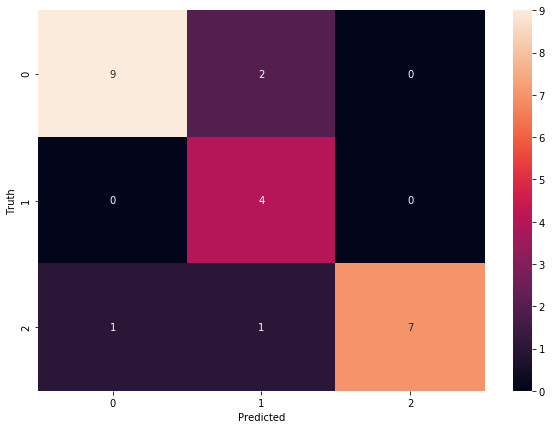

In [385]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')